# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing the thompson Sampling

In [23]:
import random
N = 100 # tried for 10000,5000,1000,500,200,100
d = 10
selected_ads = []
#step 1
no_of_rewards_0 = [0]*d
no_of_rewards_1 = [0]*d
total_rewards = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(no_of_rewards_1[i]+1,no_of_rewards_0[i]+1)
        if random_beta>max_random:
            max_random = random_beta
            ad = i
    selected_ads.append(ad)
    rewards = dataset.values[n,ad]
    if rewards == 0:
        no_of_rewards_0[ad] += 1
    else:
        no_of_rewards_1[ad] += 1
    total_rewards += rewards
    

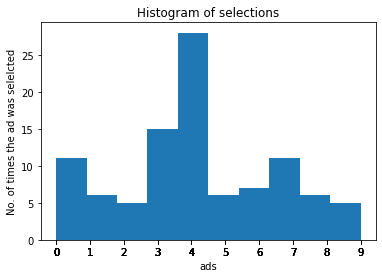

In [24]:
plt.hist(selected_ads)
plt.title('Histogram of selections')
plt.xlabel('ads')
plt.xticks(selected_ads)
plt.ylabel('No. of times the ad was selelcted')
plt.show()